In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Conjunto de dados
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/californiabin.csv')
data = pd.read_csv('californiabin.csv')

# Dividir em atributos e saída
X = data.iloc[:, :-1]  # Atributos
y = data.iloc[:, -1]   # Saída

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:

# Definir o modelo SVM com kernel RBF
svm_model = SVC(kernel='rbf', probability=True)

# Definir os parâmetros para o grid search
param_grid_svm = {
    'C': [2**i for i in range(-5, 16)],
    'gamma': [2**i for i in range(-15, 4)]
}

# Configurar o grid search com validação cruzada
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=10, scoring='accuracy')

# Ajustar o modelo aos dados de treinamento
grid_search_svm.fit(X_train, y_train)

# Melhor modelo encontrado
best_svm_model = grid_search_svm.best_estimator_


y_pred_svm = best_svm_model.predict(X_test)
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM - Accuracy: 0.785
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       212
         1.0       0.77      0.78      0.77       188

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



In [4]:
from sklearn.ensemble import RandomForestClassifier

# Definir o modelo Random Forest
rf_model = RandomForestClassifier()

# Definir os parâmetros para o grid search
param_grid_rf = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 180, 190, 200],
    'max_depth': [4, 6, 8, 10, None]
}

# Configurar o grid search com validação cruzada
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, scoring='accuracy')

# Ajustar o modelo aos dados de treinamento
grid_search_rf.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf_model = grid_search_rf.best_estimator_

# Avaliar o modelo no conjunto de teste
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest - Accuracy: 0.835
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       212
         1.0       0.82      0.84      0.83       188

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.83      0.84       400



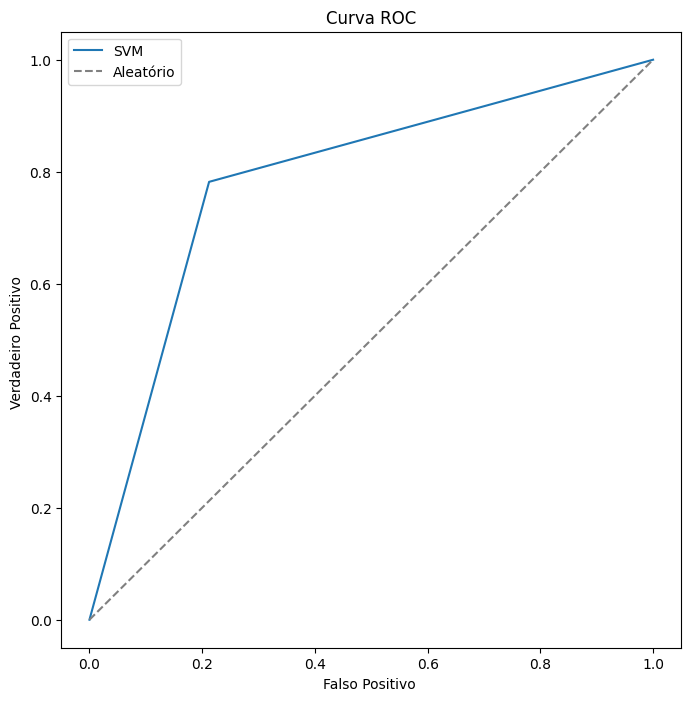

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_svm)
plt.figure(figsize = (8, 8))
plt.plot(fpr_svm, tpr_svm, label = 'SVM')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.title('Curva ROC')
plt.xlabel('Falso Positivo ')
plt.ylabel('Verdadeiro Positivo ')
plt.legend()
plt.show()

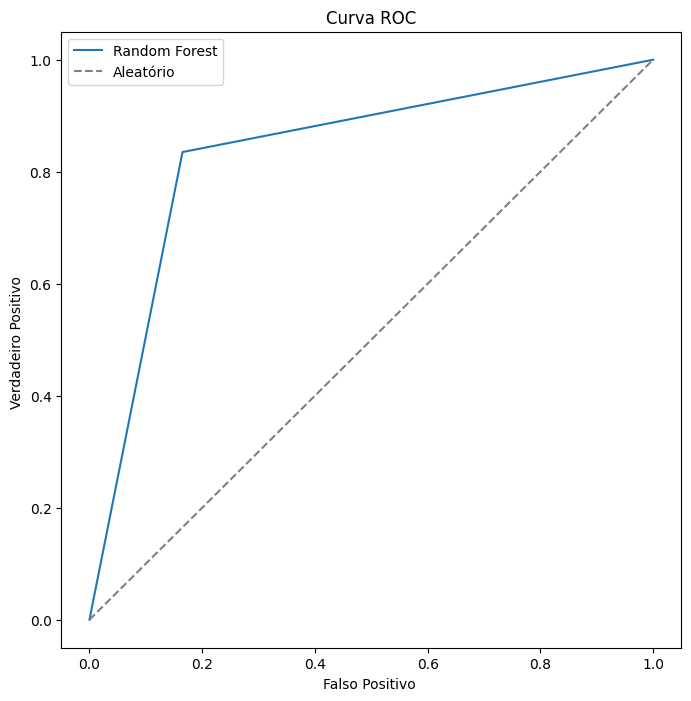

In [6]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
plt.figure(figsize = (8, 8))
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.title('Curva ROC')
plt.xlabel('Falso Positivo ')
plt.ylabel('Verdadeiro Positivo ')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

probs = best_rf_model.predict_proba(X_test)
probs = probs[:, 1]

lr_precision_rf, lr_recall_rf, __rf = precision_recall_curve(y_test, probs)

lr_f1_rf, lr_auc_rf = f1_score(y_test, y_pred_rf), auc(lr_recall_rf, lr_precision_rf)


Random Forest: f1=0.826 auc=0.930


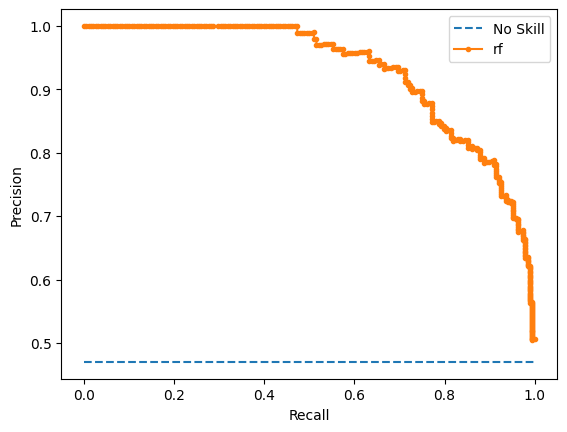

In [8]:
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1_rf, lr_auc_rf))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall_rf, lr_precision_rf, marker='.', label='rf')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [9]:
probs = best_svm_model.predict_proba(X_test)
probs = probs[:, 1]

lr_precision_svm, lr_recall_svm, __svm = precision_recall_curve(y_test, probs)

lr_f1_svm, lr_auc_svm = f1_score(y_test, y_pred_svm), auc(lr_recall_svm, lr_precision_svm)


SVM: f1=0.826 auc=0.930


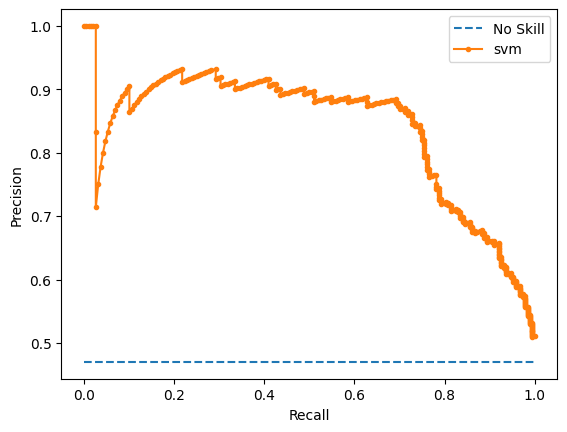

In [10]:
print('SVM: f1=%.3f auc=%.3f' % (lr_f1_rf, lr_auc_rf))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall_svm, lr_precision_svm, marker='.', label='svm')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()